# Importing and Tidying the Data

In [1]:
# import stuff
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [3]:
#import the data from csv file with a series of NAN values 
df1 = pd.read_csv('./../data/highered_00004.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )
df1 = df1.drop(['REFID'], axis=1)
df2 = pd.read_csv('./../data/highered_00007.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )
df3 = pd.read_csv('./../data/highered_00008.csv', dtype={'REFID': str},na_values=[96, 99, 98, 9996, 9998 ,
    9999, 999996, 999998, 999999, 9999998, 9999999] )
dfm = df1.merge(df2,  on=['PERSONID', 'YEAR', 'WEIGHT', 'SAMPLE', 'SURID'])

In [4]:
# explanation of the survey https://highered.ipums.org/highered/survey_designs.shtml

# Respondents from each of these three surveys with science or engineering degrees                               ##
# or occupations are compiled into one dataset: the SESTAT (the Scientists and Engineers Statistical Data System)##
df = dfm.merge(df3, on=['PERSONID', 'YEAR', 'SURID'])


In [5]:
df_employed = df[df['LFSTAT']==1]
df_employed_small = df_employed.drop(['CTZUS', 'WEIGHT', 'WRKG', 'NRREA','FNVS', 'CHTOT', 'CPI2009C', 'PERSONID', 'LFSTAT','BA03Y5', 'LOOKWK'], axis=1)
#df_employed_small.info()

In [6]:
#df_employed_l = df_employed_small[df_employed_small.SALARY != 150000]
#df_employed_l = df_employed_small[df_employed_small['NDGMEMG']==3].dropna()
df_employed_l = df_employed_small.dropna()

Next we use pandas' correlation funcion and seaborns heatmap to get a general idea of how the features are related to each other.

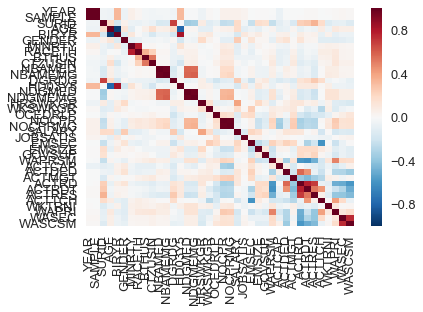

In [7]:
sns.heatmap(df_employed_l.corr())

In [8]:
df_employed_l.corr()['SALARY']

YEAR        0.047753
SAMPLE      0.049694
SURID       0.193761
AGE         0.186057
BIRYR      -0.162161
GENDER      0.257586
MINRTY     -0.102562
RACETH     -0.101382
BTHUS      -0.055799
CTZUSIN     0.012500
NBAMED     -0.037537
NBAMEMG    -0.034085
DGRDG       0.263496
HD03Y5     -0.167808
NDGMED     -0.010046
NDGMEMG    -0.001453
HRSWKGR     0.403946
WKSWKGR     0.176768
OCEDRLP    -0.128177
NOCPR      -0.091245
NOCPRMG    -0.056801
SALARY      1.000000
JOBSATIS   -0.140447
EMSEC       0.215927
EMSIZE      0.169909
GOVSUP      0.022820
WAPRSM     -0.034008
ACTCAP      0.042460
ACTDED      0.126313
ACTMGT      0.119822
ACTRD       0.115217
ACTRDT     -0.012041
ACTRES      0.036424
ACTTCH     -0.183005
WKTRNI      0.007476
WAPRI      -0.172204
WASEC      -0.133979
WASCSM     -0.141206
Name: SALARY, dtype: float64

Looks like many of the columns are catagorical and has been stored in the same column as numbers, such as the field of major, highest degree and etc. They need to be treated that way. Here pandas get_dummies are used for this purpose. 

In [9]:
df_employed_d = pd.get_dummies(df_employed_l, columns=['RACETH','NBAMED', 'NBAMEMG', 'NDGMED', 'EMSEC','EMSIZE', 'GOVSUP', 'NDGMEMG', 'OCEDRLP', 'WAPRSM', 'WAPRI', 'WKTRNI', 'WASEC', 'NOCPR','WASCSM', 'NOCPRMG', 'SAMPLE', 'HD03Y5', 'DGRDG', 'JOBSATIS','SURID','HRSWKGR','WKSWKGR'], drop_first=True)

In [10]:
X = df_employed_d[df_employed_d['YEAR']==2013].drop(['SALARY'], axis=1)
y = df_employed_d[df_employed_d['YEAR']==2013]['SALARY']

#import the machine learning algorithm packages
# Import modules of linear regresssion, evaluation, and train test split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Import Lasso
from sklearn.linear_model import Lasso
# Import Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg
reg = Ridge()


# Fit the model to the data
reg.fit(X_train,y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


0.558807434679
Root Mean Squared Error: 27269.00915709602


Only looking at the data where salary is not 0. The R2 improved slightly. 

In [11]:
df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]
X = df_employed_no[df_employed_no['YEAR']==2013].drop(['SALARY'], axis=1)
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=41)

# Create the regressor: reg
reg = Ridge()


# Fit the model to the data
reg.fit(X_train,y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

from copy import deepcopy as copy
# Cap the predicted value at 150000 as in the original data set 
y_pred = np.clip(y_pred, 0, 150000)
y_pred_base = copy( y_pred )


# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

scores = cross_val_score(reg, X_train, y_train, cv=5)
print('cross validation scores:', scores)

0.574223238079
Root Mean Squared Error: 26461.216783331813
cross validation scores: [ 0.58108617  0.56424951  0.56566613  0.56120708  0.56811548]


#### The ridge and simple linear regression both give the determination coefficient ($R^2$) result of 0.51. It is not bad considering some essential fact contributing to the salary is unknown: level of the position, location of the job,  and company pay ability. This next cell shows a histogram of the actual salaries and the predicted salaries. We see the distribution of predected salary is more centrally located around the mean. Can this give us a hint as to what to do next?

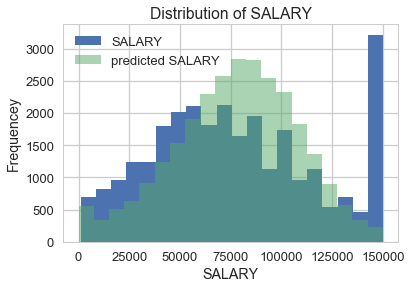

In [12]:
plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()

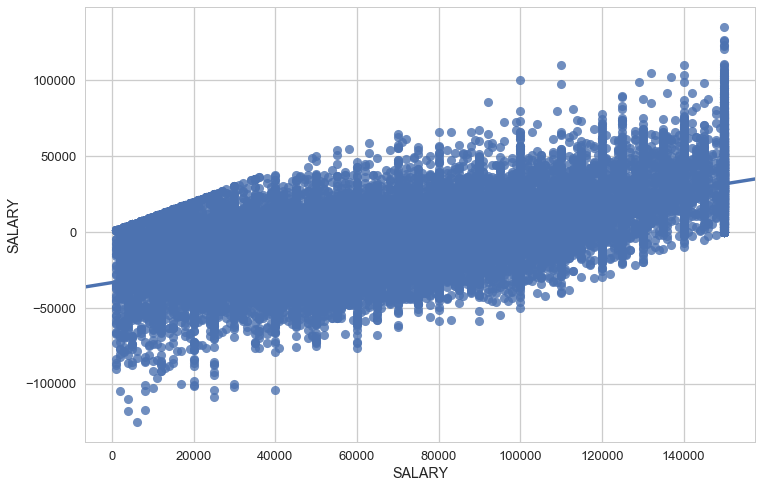

In [13]:
#### GREG ADDED - DELETE LATER ###

fig, ax = plt.subplots( figsize=( 12,8))
sns.regplot( y_test, y_test - y_pred)

In [14]:
df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]
X = df_employed_no[df_employed_no['YEAR']==2013].drop(['SALARY'], axis=1)
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary() )
#m3 = ols(formula='SALARY ~ ALL',data = df_employed_d).fit()
#print(m3.summary())



/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     896.8
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:55:11   Log-Likelihood:            -1.0939e+06
No. Observations:               94233   AIC:                         2.188e+06
Df Residuals:                   94092   BIC:                         2.189e+06
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YEAR               49.0689     62.176     

/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [15]:
feature_p = pd.DataFrame(res.pvalues, columns=['Pvalue'])
feature_select = feature_p[feature_p['Pvalue']<=0.001]
ls = feature_select.index.tolist()

df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]

X = df_employed_no[df_employed_no['YEAR']==2013][ls]
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']

mod = sm.OLS(y, X)
res2 = mod.fit()
print(res2.summary() )
#m3 = ols(formula='SALARY ~ ALL',data = df_employed_d).fit()
#print(m3.summary())


                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     1159.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:55:14   Log-Likelihood:            -1.0940e+06
No. Observations:               94233   AIC:                         2.188e+06
Df Residuals:                   94124   BIC:                         2.189e+06
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
GENDER           5820.0479    199.400     

In [16]:
feature_p = pd.DataFrame(res2.pvalues, columns=['Pvalue'])
feature_select = feature_p[feature_p['Pvalue']<=0.001]
ls = []
ls = feature_select.index.tolist()

df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]

X = df_employed_no[df_employed_no['YEAR']==2013][ls]
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']

mod = sm.OLS(y, X)
res3 = mod.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 1.117e+04
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:55:16   Log-Likelihood:            -1.0948e+06
No. Observations:               94233   AIC:                         2.190e+06
Df Residuals:                   94152   BIC:                         2.191e+06
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
GENDER           6031.4775    191.477     

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     8276.
Date:                Thu, 26 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:55:17   Log-Likelihood:            -7.6644e+05
No. Observations:               65963   AIC:                         1.533e+06
Df Residuals:                   65887   BIC:                         1.534e+06
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
GENDER           5813.8048    228.110     

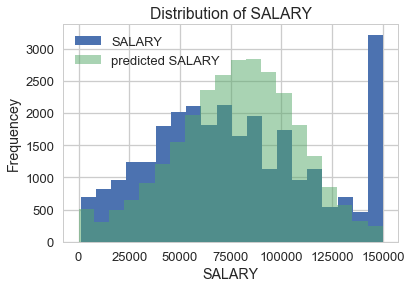

In [17]:
feature_p = pd.DataFrame(res3.pvalues, columns=['Pvalue'])
feature_select = feature_p[feature_p['Pvalue']<=0.001]
ls = []
ls = feature_select.index.tolist()

df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]



X = df_employed_no[df_employed_no['YEAR']==2013][ls]
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=41)


mod = sm.OLS(y_train, X_train)
res4 = mod.fit()
print(res4.summary())

y_pred = res4.predict(X_test)
y_pred = np.clip(y_pred, 0, 150000)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()


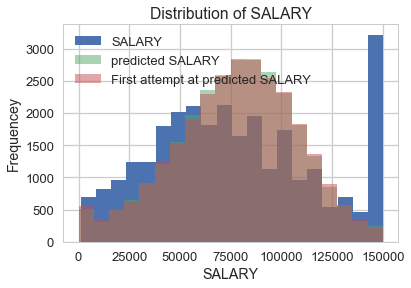

In [18]:
### GREG ADDED - DELETE LATER ###

plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.hist(y_pred_base, bins=20, alpha=0.5, label='First attempt at predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()



In [19]:
### GREG ADDED - DELETE LATER ###
n = y_pred.shape[0]
n_base = y_pred_base.shape[0] 

y_pred_mean = np.mean( y_pred )
y_pred_base_mean = np.mean( y_pred_base )

SSE = np.sum( ( y_pred - y_test) * ( y_pred - y_test ) )
SSE_base = np.sum( ( y_pred_base - y_test) * ( y_pred_base - y_test ) )

TSS = np.sum( ( y_pred - y_pred_mean ) * ( y_pred - y_pred_mean ) )
TSS_base = np.sum( ( y_pred_base - y_pred_base_mean ) * ( y_pred_base - y_pred_base_mean) )

print( y_pred_mean, y_pred_base_mean )
print( SSE, SSE_base )
print( TSS, TSS_base )
print( SSE / TSS, SSE_base / TSS_base)
print( np.sqrt( mean_squared_error( y_pred, y_test) ), np.sqrt( mean_squared_error( y_pred_base, y_test) ) )


77531.90228370526 77487.6451098
20236044526265.426 19794540740612.1
25464651882090.715 2.60115069242e+13
0.7946719483920153 0.76099169488
26754.6891157 26461.2167833


77531.90228370526 77487.6451098


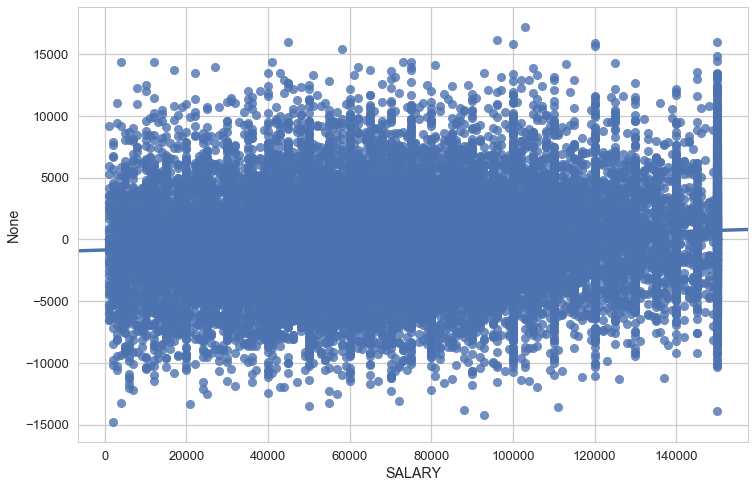

In [20]:
### GREG ADDED - DELETE LATER ###
print( np.mean( y_pred), np.mean( y_pred_base ))



fig, ax = plt.subplots( figsize = (12,8))
sns.regplot( y_test, y_pred_base - y_pred, ax = ax )

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     85.86
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          9.45e-267
Time:                        21:55:21   Log-Likelihood:                -7514.3
No. Observations:                 650   AIC:                         1.518e+04
Df Residuals:                     574   BIC:                         1.552e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
GENDER           6761.3114   2489.066     

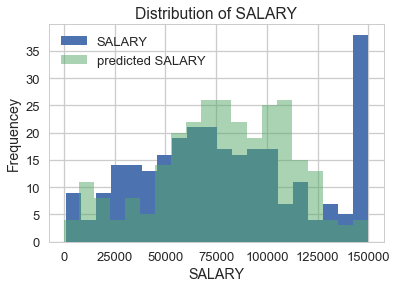

In [21]:
feature_p = pd.DataFrame(res3.pvalues, columns=['Pvalue'])
feature_select = feature_p[feature_p['Pvalue']<=0.001]
ls = []
ls = feature_select.index.tolist()

df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)].sample(frac=0.01, random_state=41).reset_index()

X = df_employed_no[df_employed_no['YEAR']==2013][ls]
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=41)


mod = sm.OLS(y_train, X_train)
res4 = mod.fit()
print(res4.summary())

y_pred = res4.predict(X_test)
y_pred = np.clip(y_pred, 0, 150000)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()

#infl = res4.get_influence()
#print(infl.)

#X_train[res4.outlier_test()['bonf(p)']!=1].index

In [22]:
#infl = res4.get_influence()

test = res4.outlier_test() 
outliers = X_train[(test['unadj_p'] < 0.5)].index
X_train_new =X_train.drop(outliers, axis=0)
y_train_new =y_train.drop(outliers, axis=0)


/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     366.8
Date:                Thu, 26 Apr 2018   Prob (F-statistic):          1.32e-223
Time:                        21:55:39   Log-Likelihood:                -3434.3
No. Observations:                 330   AIC:                             7021.
Df Residuals:                     254   BIC:                             7309.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
GENDER           6313.5924   1311.821     

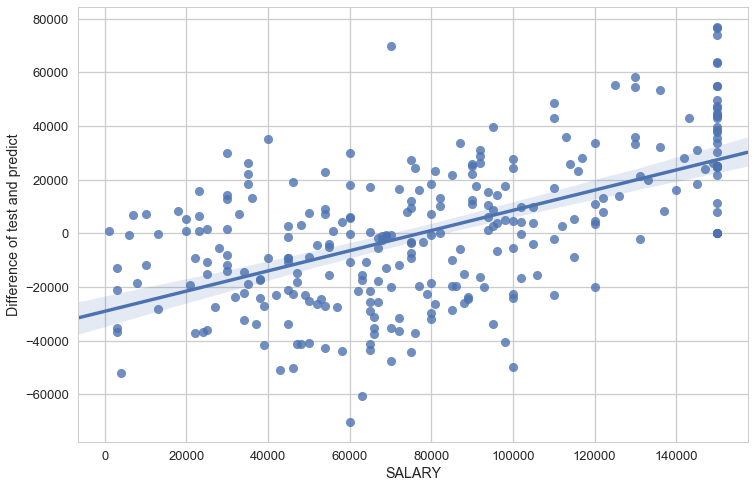

In [23]:
mod = sm.OLS(y_train_new, X_train_new)
res5 = mod.fit()
print(res5.summary())

y_pred = res5.predict(X_test)
y_pred = np.clip(y_pred, 0, 150000)
y_pred_train = res5.predict(X_train_new)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

fig, ax = plt.subplots( figsize=( 12,8))
sns.regplot( y_test, y_test - y_pred)
plt.ylabel('Difference of test and predict')


In [24]:
feature_p = pd.DataFrame(res3.pvalues, columns=['Pvalue'])
feature_select = feature_p[feature_p['Pvalue']<=0.001]
ls = []
ls = feature_select.index.tolist()

df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]

X = df_employed_no[df_employed_no['YEAR']==2013][ls]
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']


#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=41)

# Create the regressor: reg
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# Cap the predicted value at 150000 as in the original data set 
y_pred = np.clip(y_pred, 0, 150000)

# Print R^2 
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

print(X.shape)

scores = cross_val_score(reg, X_train, y_train, cv=5)
print('cross validation scores:', scores)


0.562114694336
0.56618959735
Root Mean Squared Error: 26723.420129859078
(94233, 76)
cross validation scores: [ 0.57310267  0.55750762  0.55929117  0.55305021  0.56165947]


Above gives the result from the linear regresssion by statsmodel. We see the correlation is statistically significant (p-value from the F-statistic). The R^2 score is consistent with what is given by sklearn linear models. 

How about polynomial regression? => not improving the result at degree =2. At degree =3, it is taking too long to finish running. 

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

df_sample = df_employed_no.sample(frac=0.01, random_state=42)

X_s = df_sample.drop(['SALARY'], axis=1)
y_s = df_sample['SALARY']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=42)



model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                   ('linear', LinearRegression())])

# fit to an order-2 polynomial data

model.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = model.predict(X_test)

# Print R^2 
print(model.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


-0.112920954541
Root Mean Squared Error: 41257.78101548474


I tried to use the log of the target feature (salary), it gave a better result (0.57=>0.6) when taking a power of 6.

In [26]:
df_sample = df_employed_no[df_employed_no['YEAR']==2013]
#.sample(frac=0.2, random_state=42)

X_s = df_sample.drop(['SALARY'], axis=1)
y_s = np.log(df_sample['SALARY'])**6

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=41)

reg = LinearRegression()

# fit to an order-2 polynomial data

reg.fit(X_train, y_train)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_test)

# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))



0.603876529305
Root Mean Squared Error: 391760.7756809568


In [27]:
#Use grid search for random forest regressor
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
X = df_employed_no[df_employed_no['YEAR']==2013].drop(['SALARY'], axis=1)
y = df_employed_no[df_employed_no['YEAR']==2013]['SALARY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=41)

param_grid = {"n_estimators": [10, 30, 50],
              "max_features": [10, 30],
              "max_depth": [10, 100, 300]
              }

# Instantiate a logistic regression classifier: logreg
rfr = RandomForestRegressor()

# Instantiate the GridSearchCV object: logreg_cv
rfr_cv = GridSearchCV(rfr, param_grid, cv=5)

# Fit it to the data
rfr_cv.fit(X_train,y_train)

y_rfr_cv = rfr_cv.predict(X_test)

rmse_rfr_cv = np.sqrt(mean_squared_error(y_test,y_rfr_cv))

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(rfr_cv.best_params_)) 
print("Best score is {}".format(rfr_cv.best_score_))

# test data result
print("Score on the test data is: ", rfr_cv.score(X_test, y_test))

# Print RMSE
print("RBF Root Mean Squared Error: {}".format(rmse_rfr_cv))

Tuned Logistic Regression Parameters: {'max_depth': 300, 'max_features': 30, 'n_estimators': 50}
Best score is 0.5812011109491558
Score on the test data is:  0.593222175636
RBF Root Mean Squared Error: 25979.23391166251


0.595604567951
RBF Root Mean Squared Error: 25903.045373008918


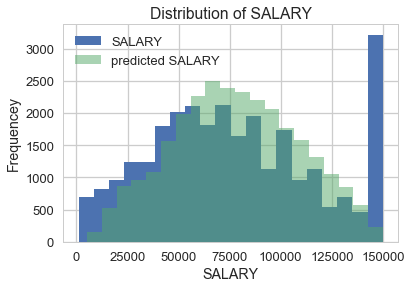

In [28]:
## Trying random forest regressor 
#df_sample = df_employed_no[df_employed_no['YEAR']==2013]
#.sample(frac=0.2, random_state=42)

#X_s = df_sample.drop(['SALARY'], axis=1)
#y_s = df_sample['SALARY']

#train test split
#X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state=41)

#feature_p = pd.DataFrame(res3.pvalues, columns=['Pvalue'])
#feature_select = feature_p[feature_p['Pvalue']<=0.001]
#ls = []
#ls = feature_select.index.tolist()

df_employed_no = df_employed_d[(df_employed_d['SALARY']>0)]

X = df_employed_no[(df_employed_no['YEAR']==2013)].drop(['SALARY'],axis=1)
y = df_employed_no[(df_employed_no['YEAR']==2013)]['SALARY']


#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=41)

# Use the random forest regressor
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=50, max_features=76, max_depth=100)

#rfr.fit(X,y)
# Use feature selection
#model = SelectFromModel(rfr, prefit=True)
#X_new = model.transform(X)

#train test split
#X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)

y_rfr = rfr.fit(X_train, y_train).predict(X_test)

#y_rfr = np.clip(y_rfr, 0, 150000)

rmse_rfr = np.sqrt(mean_squared_error(y_test,y_rfr))

# Print R2
print(rfr.score(X_test, y_test))
#print(coefficient_of_determination(y_test, y_rfr))

# Print RMSE
print("RBF Root Mean Squared Error: {}".format(rmse_rfr))


plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_rfr,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()

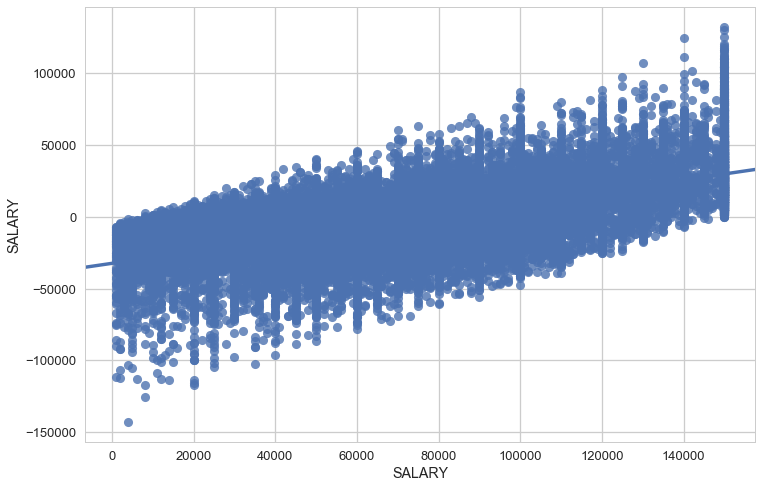

In [29]:
#### GREG ADDED - DELETE LATER ###

fig, ax = plt.subplots( figsize=( 12,8))
sns.regplot( y_test, y_test - y_rfr)

Delete rows with 150000 salary and try the regression again. Linear regression:

0.544967460751
Root Mean Squared Error: 23092.40543115738


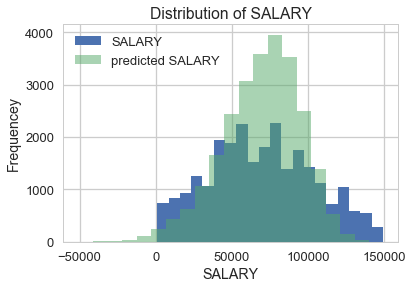

In [30]:
## Regression on data with less than 150000 salary


df_decap = df_sample[df_sample['SALARY']<150000]
X = df_decap.drop(['SALARY'], axis=1)
y = df_decap['SALARY']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#y_pred = np.clip(y_pred, 0, 150000)

# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

#visualize the actual and predicted salaries 
plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()


Random forest regressor with less 150000 salary entries:

Score on the test data is:  0.556905082186
Root Mean Squared Error: 22787.481608260074


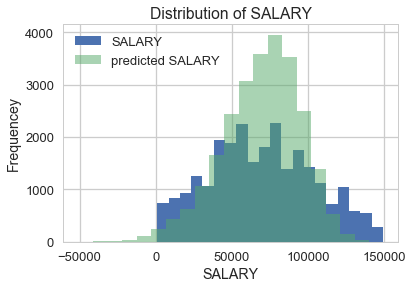

In [31]:
# Instantiate a random forest regressor
rfr = RandomForestRegressor(n_estimators=100, max_features=25, max_depth=100)

# Fit it to the data
rfr.fit(X_train,y_train)

y_rfr = rfr.predict(X_test)

rmse_rfr = np.sqrt(mean_squared_error(y_test,y_rfr))

# test data result
print("Score on the test data is: ", rfr.score(X_test, y_test))

# Print RMSE
print("Root Mean Squared Error: {}".format(rmse_rfr))


#visualize the actual and predicted salaries 
plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()


#### The result does not seem better when neglecting the capped target rows!

Use feature selection and try the regression again.

shape of X:  (94233, 183)
shape of X_new:  (94233, 41)
0.206984250494
Root Mean Squared Error: 36207.13081887106


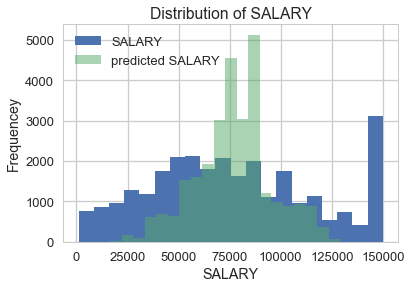

In [32]:
X = df_sample.drop(['SALARY'], axis=1)
y = df_sample['SALARY']

reg = LinearRegression()
reg.fit(X,y)

from sklearn.feature_selection import SelectFromModel
#Use feature selection
model = SelectFromModel(reg, prefit=True)
X_new = model.transform(X)

print("shape of X: ", X.shape)
print("shape of X_new: ", X_new.shape)
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=42)

# Fit the model to the new data
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = np.clip(y_pred, 0, 150000)


# Print R^2 
print(reg.score(X_test, y_test))

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# your turn

plt.hist(y_test, bins=20, label='SALARY')
plt.hist(y_pred,  bins=20, alpha=0.5, label='predicted SALARY')
plt.title("Distribution of SALARY")
plt.legend()
plt.xlabel("SALARY")
plt.ylabel("Frequencey")
plt.show()


#### The score ($R^2$) did not improve with the data processing of feature selection （selectfrommodel). 

In [33]:
## Trying SVR 
from sklearn.svm import SVR

df_sample = df_employed_no.sample(frac=0.1, random_state=42)

X = df_sample.drop(['SALARY'], axis=1)
y = df_sample['SALARY']


#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


svr_rbf = SVR(kernel='rbf', C=120000, gamma=0.005)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
#y_lin = svr_fit(X_train, y_train).predict(X_test)
#y_poly = svr_fit(X_train, y_train).predict(X_test)

rmse_rbf = np.sqrt(mean_squared_error(y_test,y_rbf))
#rmse_lin = np.sqrt(mean_squared_error(y_test,y_lin))
#rmse_poly = np.sqrt(mean_squared_error(y_test,y_poly))

# Print R^2 
print(svr_rbf.score(X_test, y_test))

# Print RMSE
print("RBF Root Mean Squared Error: {}".format(rmse_rbf))
#print("LIN Root Mean Squared Error: {}".format(rmse_lin))
#print("Poly Root Mean Squared Error: {}".format(rmse_poly))

0.548718111248
RBF Root Mean Squared Error: 26649.728727767124


In [34]:
# Trying to predict NOCPRMG or WAPRSM

In [35]:
#df_employed_clf = df_employed_no
df_employed_clf =[]
df_employed_clf = df_employed_l[df_employed_l['SALARY']>0]
df_employed_clf.columns

Index(['YEAR', 'SAMPLE', 'SURID', 'AGE', 'BIRYR', 'GENDER', 'MINRTY', 'RACETH',
       'BTHUS', 'CTZUSIN', 'NBAMED', 'NBAMEMG', 'DGRDG', 'HD03Y5', 'NDGMED',
       'NDGMEMG', 'HRSWKGR', 'WKSWKGR', 'OCEDRLP', 'NOCPR', 'NOCPRMG',
       'SALARY', 'JOBSATIS', 'EMSEC', 'EMSIZE', 'GOVSUP', 'WAPRSM', 'ACTCAP',
       'ACTDED', 'ACTMGT', 'ACTRD', 'ACTRDT', 'ACTRES', 'ACTTCH', 'WKTRNI',
       'WAPRI', 'WASEC', 'WASCSM'],
      dtype='object')

In [36]:
#classify genders from other features: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


X = df_employed_clf.drop(['GENDER'], axis=1)
y = df_employed_clf['GENDER']

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

#initiate a instance for classifier
clf = RandomForestClassifier(n_estimators=100, max_features=25, max_depth=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[27874 16798]
 [10830 61467]]
             precision    recall  f1-score   support

          1       0.72      0.62      0.67     44672
          2       0.79      0.85      0.82     72297

avg / total       0.76      0.76      0.76    116969



In [37]:
#predict gender for social science jobs (almost the same men and women in the field)

X = df_employed_clf[df_employed_clf['NOCPRMG']==4].drop(['GENDER'], axis=1)
y = df_employed_clf[df_employed_clf['NOCPRMG']==4]['GENDER']

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#initiate a instance for classifier
clf = RandomForestClassifier(n_estimators=30, max_features=25, max_depth=200)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[3818 1202]
 [1570 3047]]
             precision    recall  f1-score   support

          1       0.71      0.76      0.73      5020
          2       0.72      0.66      0.69      4617

avg / total       0.71      0.71      0.71      9637



In [38]:
#classify the field of job from other columns 
#Use dummied data to model

df_employed_field = pd.get_dummies(df_employed_l, columns=['RACETH','NBAMED', 'NBAMEMG', 'NDGMED', 'EMSEC','EMSIZE', 'GOVSUP', 'NDGMEMG', 'OCEDRLP', 'WAPRSM', 'WAPRI', 'WKTRNI', 'WASEC', 'WASCSM', 'SAMPLE', 'HD03Y5', 'DGRDG', 'JOBSATIS','SURID','HRSWKGR','WKSWKGR'], drop_first=True)
df_employed_field_no = df_employed_field[df_employed_field['SALARY']!=0]
X = df_employed_field_no[df_employed_no['GENDER']==1].drop(['NOCPRMG','NOCPR'], axis=1)
y = df_employed_field_no[df_employed_no['GENDER']==1]['NOCPRMG']

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

#initiate a instance for classifier
clf = RandomForestClassifier(n_estimators=100, max_features=25, max_depth=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3102    79    40    64   190   258   616]
 [   49  3073   184    92    66   379   299]
 [   27   228  1352    19    72   101   170]
 [   55    72    11  3944    11   147   798]
 [  224    50    88     6  2184    53   237]
 [  495   580   112   132   213  8172  1559]
 [  360   281   101   685   294  1197 12138]]
             precision    recall  f1-score   support

        1.0       0.72      0.71      0.72      4349
        2.0       0.70      0.74      0.72      4142
        3.0       0.72      0.69      0.70      1969
        4.0       0.80      0.78      0.79      5038
        5.0       0.72      0.77      0.74      2842
        6.0       0.79      0.73      0.76     11263
        7.0       0.77      0.81      0.79     15056

avg / total       0.76      0.76      0.76     44659



In [39]:
#predict the field of job from other columns 
#Use original data to feed into random forest classifier

X = df_employed_clf[df_employed_clf['GENDER']==1].drop(['NOCPRMG','NOCPR'], axis=1)
y = df_employed_clf[df_employed_clf['GENDER']==1]['NOCPRMG']

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

#initiate a instance for classifier
clf = RandomForestClassifier(n_estimators=100, max_features=25, max_depth=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3119    77    38    71   197   248   599]
 [   53  3069   177    88    61   396   298]
 [   23   236  1338    18    72   105   177]
 [   59    72     9  3971    14   140   773]
 [  204    56    94     3  2192    58   235]
 [  460   572   104   139   210  8216  1562]
 [  376   285   119   712   283  1172 12109]]
             precision    recall  f1-score   support

        1.0       0.73      0.72      0.72      4349
        2.0       0.70      0.74      0.72      4142
        3.0       0.71      0.68      0.70      1969
        4.0       0.79      0.79      0.79      5038
        5.0       0.72      0.77      0.75      2842
        6.0       0.79      0.73      0.76     11263
        7.0       0.77      0.80      0.79     15056

avg / total       0.76      0.76      0.76     44659



#### Dummied and original data gave the same result with the random forest classifier

In [40]:
# Predict women prime job activity from other not related columns 

X = df_employed_clf[df_employed_clf['GENDER']==1].drop(['SALARY', 'WAPRSM', 'WAPRI', 'WASEC','WASCSM'], axis=1)
y = df_employed_clf[df_employed_clf['GENDER']==1]['WAPRSM'].astype('category')

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

#initiate a instance for classifier
clf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7807  533  747  251  254]
 [ 286 7066  183   10  256]
 [1049  453 9388  261  965]
 [ 237   28  226 1819   64]
 [ 761  351 1935   89 9640]]
             precision    recall  f1-score   support

        1.0       0.77      0.81      0.79      9592
        2.0       0.84      0.91      0.87      7801
        3.0       0.75      0.77      0.76     12116
        4.0       0.75      0.77      0.76      2374
        5.0       0.86      0.75      0.80     12776

avg / total       0.80      0.80      0.80     44659



### Unsupervised learning 

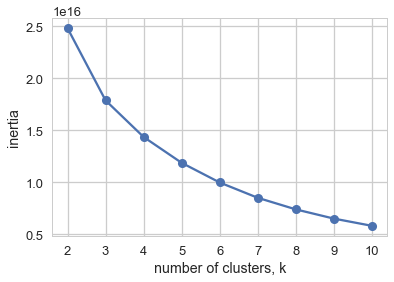

In [41]:
## Unsupervised learning model K means to find clusters.
## find number of clusters first

#X = df_employed_clf[df_employed_clf['NOCPRMG']==5].drop(['GENDER'], axis=1)
X = df_employed_clf.drop(['SALARY'], axis=1)

from sklearn.cluster import KMeans

#choose number of clusters by inertia

inertia = []
ks=range(2,11)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
     # Append the inertia to the list of inertias
    inertia.append(model.inertia_)
    
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#elbow point k=3

Use the number of clusters found above to cluster with KMeans. (original columns)

mean salary of the clusters: cluster
0    77716.730288
1    78733.069943
Name: salary, dtype: float64


/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


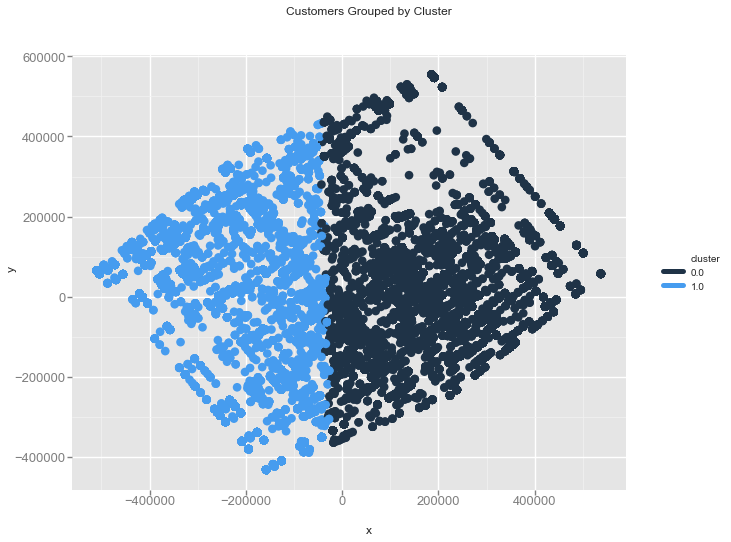

<ggplot: (-9223372036550502845)>

In [42]:
#Use original columns to find clusters

model = KMeans(n_clusters=2)
X_sample_o = df_employed_clf.sample(frac=0.1, random_state=41)
X_sample = X_sample_o.drop(['SALARY'], axis=1)
clster = model.fit_predict(X_sample)

#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X_sample)


X_sample['x'] = pca.fit_transform(X_sample)[:,0]
X_sample['y'] = pca.fit_transform(X_sample)[:,1]
X_sample['cluster'] = clster
X_sample['salary'] = X_sample_o['SALARY']
print('mean salary of the clusters:', X_sample.groupby('cluster').salary.mean())
                     
from ggplot import *

ggplot(X_sample, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")
    
    


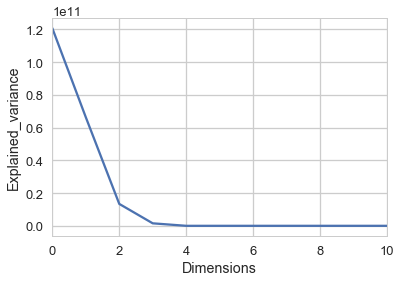

In [43]:
#your turn

# Initialize a new PCA model with a default number of components.
pca = sklearn.decomposition.PCA()
pca.fit(X_sample)

#plot explained variance
plt.plot(pca.explained_variance_)
plt.xlim([0,10])
plt.xlabel('Dimensions')
plt.ylabel('Explained_variance')



In [44]:
## Look at the difference of clusters: seems like the majors and fields are different
X_sample.groupby('cluster').mean().transpose()

cluster,0,1
YEAR,2008.316221,2008.208284
SAMPLE,813.973191,810.092845
SURID,1.183055,1.536762
AGE,45.203063,44.891598
BIRYR,1961.113817,1961.326934
GENDER,1.603308,1.639360
MINRTY,0.197578,0.156676
RACETH,2.057918,1.974258
BTHUS,0.778114,0.734305
CTZUSIN,0.934141,0.888820


Use the number of clusters found above to cluster with KMeans. (dummied column) We notice a different results from clustered with original columns.

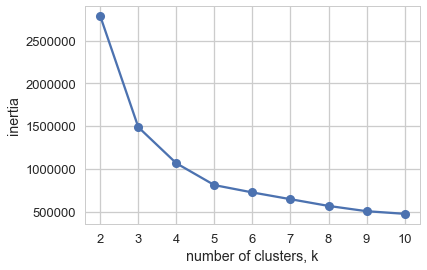

In [45]:
#Use dummied columns to find clusters, delete the salary, age, year and birth year factor and find clusters. 
#Find K first


X_sample_o = df_employed_no[df_employed_no['YEAR']==2013].sample(frac=0.3, random_state=41)
X_sample = X_sample_o.drop(['SALARY'], axis=1)

from sklearn.cluster import KMeans

#choose number of clusters by inertia

inertia = []
ks=range(2,11)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_sample)
     # Append the inertia to the list of inertias
    inertia.append(model.inertia_)
    
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()



In [46]:
#Use dummied columns to find clusters

model = KMeans(n_clusters=4)
X_sample_o = df_employed_no[df_employed_no['YEAR']==2013].sample(frac=0.3, random_state=41)
X_sample = X_sample_o.drop(['SALARY'], axis=1)
clster = model.fit_predict(X_sample)

#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X_sample)


X_sample['x'] = pca.fit_transform(X_sample)[:,0]
X_sample['y'] = pca.fit_transform(X_sample)[:,1]
X_sample['cluster'] = clster
X_sample['salary'] = X_sample_o['SALARY']

print('mean salary of the clusters:', X_sample.groupby('cluster').salary.mean())
                
## Look at the difference of clusters: seems like the age is the major differences
print(X_sample.groupby('cluster').mean().transpose())

print(X_sample.groupby('cluster')['SAMPLE_1001'].mean())


#from ggplot import *

#ggplot(X_sample, aes(x='x', y='y', color='cluster')) + \
#    geom_point(size=75) + \
#    ggtitle("Customers Grouped by Cluster")
    

mean salary of the clusters: cluster
0    91887.012231
1    81093.792685
2    84606.302809
3    58223.930251
Name: salary, dtype: float64
cluster                     0             1             2             3
YEAR              2013.000000   2013.000000   2013.000000   2013.000000
AGE                 50.897612     38.368796     64.116693     29.096363
BIRYR             1960.049505   1972.616482   1946.595113   1982.452679
GENDER               1.602679      1.557596      1.694679      1.485832
MINRTY               0.183576      0.230991      0.131309      0.263049
BTHUS                0.749097      0.675065      0.834665      0.777217
CTZUSIN              0.950262      0.835180      0.986070      0.870483
ACTCAP               0.107280      0.116406      0.061201      0.146036
ACTDED               0.209086      0.221278      0.164649      0.251119
ACTMGT               0.549214      0.506298      0.505595      0.459906
ACTRD                0.425859      0.488238      0.380909      0.48032

Change the salary column from numeric to catagorical. Define the discrete steps.

In [47]:
def salary_bracket(ls):
    new_s = np.empty(len(ls))
    for i,s in enumerate(ls):
        if s<60000:
            new_s[i] = 1
        else:
            new_s[i] = 2
    return new_s

new_salary = salary_bracket(df_employed_clf[df_employed_clf['YEAR']==2013]['SALARY'])


In [48]:
df_employed_nod = []
df_employed_nod = df_employed_clf[df_employed_clf['YEAR']==2013].assign(salary_d=pd.Series(new_salary).values)

In [49]:
df_employed_nod.salary_d = df_employed_nod.salary_d.astype('category')
df_employed_nod=df_employed_nod.drop(['SALARY'], axis=1)

In [50]:
X = df_employed_nod[(df_employed_nod['GENDER']==1)].drop(['salary_d'], axis=1)
y = df_employed_nod[(df_employed_nod['GENDER']==1)]['salary_d']

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#initiate a instance for classifier
#clf = LogisticRegression()
clf = RandomForestClassifier(n_estimators=50, max_depth=100)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = clf.predict(X_test)

from sklearn.model_selection import cross_val_score
print(cross_val_score(clf, X_train, y_train, cv=5))

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[ 0.789793    0.79157744  0.79282655  0.79764454  0.79389722]
[[4538 1187]
 [1252 5032]]
             precision    recall  f1-score   support

        1.0       0.78      0.79      0.79      5725
        2.0       0.81      0.80      0.80      6284

avg / total       0.80      0.80      0.80     12009



In [51]:
y.value_counts()

2.0    20769
1.0    19260
Name: salary_d, dtype: int64